## Python Project for Data Science

Building an interactive Dashboard for analyzing the Stock Performance.

A dashboard often provides a view of key performance indicators in a clear way. 
Analyzing a data set and extracting key performance indicators will be practiced. 
Prompts will be used to support learning in accessing and displaying data in dashboards. 
Learning how to display key performance indicators on a dashboard is included in this project. 
Ploty is used. 



In [9]:
!pip install yfinance==0.1.67
!pip install panadas==1.3.3 

ERROR: Could not find a version that satisfies the requirement panadas==1.3.3 (from versions: none)
ERROR: No matching distribution found for panadas==1.3.3


## Extracting Stock Data Using a Python Library

In [10]:

import yfinance as yf
import pandas as pd
#importing the libraries 

Using the yfinance Library to Extract Stock Data.

Using the Ticker module, we can create an object that will allow us to access functions to extract data.

To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [11]:
apple = yf.Ticker("AAPL")

Using the attribute 'info' we can extract information about the stock as a Python dictionary.

In [13]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [14]:
apple_info['country']

'United States'

In [15]:
#Extracting share price
apple_share_price= apple.history(period="max")
apple_share_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100323,0.100759,0.100323,0.100323,469033600,0.0,0.0
1980-12-15,0.095525,0.095525,0.095089,0.095089,175884800,0.0,0.0
1980-12-16,0.088546,0.088546,0.088110,0.088110,105728000,0.0,0.0
1980-12-17,0.090291,0.090727,0.090291,0.090291,86441600,0.0,0.0
1980-12-18,0.092908,0.093345,0.092908,0.092908,73449600,0.0,0.0


We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

In [16]:
apple_share_price.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

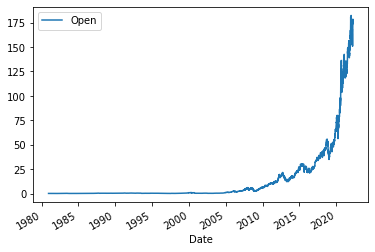

In [18]:
apple_share_price.plot(x="Date", y="Open")

#### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [17]:
 apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
Name: Dividends, Length: 74, dtype: float64

<AxesSubplot:xlabel='Date'>

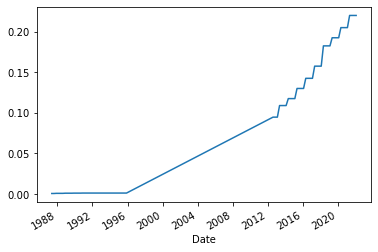

In [18]:
apple.dividends.plot()

## Extracting Stock Data Using Web Scraping


In [19]:
#installing libraries 

!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
!pip install plotly==5.3.1

zsh:1: command not found: mamba
zsh:1: command not found: mamba


In [20]:
# importing libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup

### Using Webscraping to Extract Stock Data Example

First , must use the request library to download the webpage, and extract the text. We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html.

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

Parsing the text into html using Beautiful Soup

In [22]:
soup = BeautifulSoup(data, 'html5lib')

In [23]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information

# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [25]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [26]:
read_html_pandas_data = pd.read_html(url)
#OR
#read_html_pandas_data = pd.read_html(str(soup))

In [27]:
netflix_dataframe = read_html_pandas_data[0]
netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
